# Polynomial Approximation

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
tf.__version__

'2.4.1'

## Linear regression

In [8]:
## training data (linear relation can be seen from scatter plot)
np.random.seed(1)
x_train = np.linspace(-40,40,20)
y_train = 0.3*x_train+np.random.normal(0, 1, len(x_train))

We here build a network with 1 hidden layer of 3 hidden neurons to approximate the relation. After train the model, we use `model.predict()` to find the predictions.

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Dense(1))
# model.metrics_names

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(x_train,y_train, epochs=100, verbose=0)

y_pred = model.predict(x_train)

Now make the plot comparing the scatter plot using the training data and the predicted value from the constructed neural network.

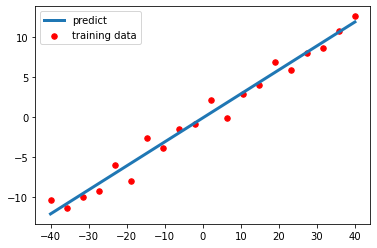

In [23]:
plt.figure()
plt.scatter(x_train,y_train,label='training data',marker='o',color='r',s=30)
plt.plot(x_train,y_pred,label='predict',linewidth=3)
plt.legend();

## Polynomial Regression

When the scatter plot did not show a linear trend, we know a nonlinear relation exists. We can make a guess of the possible polynomial order $n$. To use the neural network, we will first need to transform our input data using `PolynomialFeatures` from `sklearn.preprocessing`. If polynomial degree $n$, then the neural network will have the input size $n+1$ ($x^0, x^1, \ldots, x^n$).

In [48]:
from sklearn.preprocessing import PolynomialFeatures
n = 3

np.random.seed(1)
x_train1 = np.linspace(-40,40,21)
y_train1 = 0.3*x_train1**3 - x_train1**2 + 5*x_train1 + 1 + np.random.normal(0, 1, 1)

x_expand = np.expand_dims(x_train1,axis=1)    #make it a column array
poly = PolynomialFeatures(n)
x_expand = poly.fit_transform(x_expand)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1))
# model.metrics_names

model1.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model1.fit(x_expand,y_train1, epochs=100, verbose=0)

y_pred1 = model1.predict(x_expand)

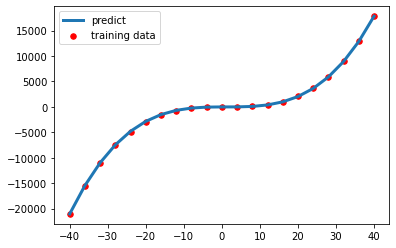

In [49]:
plt.figure()
plt.scatter(x_train1,y_train1,label='training data',marker='o',color='r',s=30)
plt.plot(x_train1,y_pred1,label='predict',linewidth=3)
plt.legend();